In [42]:
import tensorflow as tf
import os

In [43]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [44]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [45]:
img = cv2.imread(os.path.join('data/', 'FAKE', 'AdobeStock_559145847.jpeg'))

In [46]:
img.shape

(1333, 2000, 3)

### Loading the data

In [47]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(32, 32))

Found 1082 files belonging to 2 classes.


In [48]:
data_it = data.as_numpy_iterator()

In [49]:
batch = data_it.next()

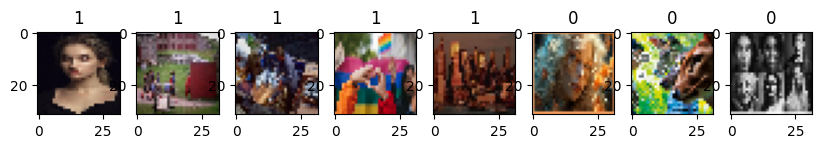

In [50]:
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [51]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


Scaling the data between 0 and 1

In [52]:
data = data.map(lambda x, y : (x/255, y))

In [53]:
scaled_it = data.as_numpy_iterator()

In [54]:
batch = scaled_it.next()

In [55]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


Splitting the data into training, cross-validation and testing sets

In [56]:
len(data)

34

In [57]:
train_size = int(len(data)*0.7)
cv_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [58]:
train_size+cv_size+test_size

33

In [59]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)

In [60]:
len(train)+len(cv)+len(test)

33

### Building the DL Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
logdir = 'logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train, epochs=20, validation_data=cv, callbacks=[tensorboard_callback])

Epoch 1/20


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5110 - loss: 0.6957 - val_accuracy: 0.5885 - val_loss: 0.6878
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5936 - loss: 0.6867 - val_accuracy: 0.5729 - val_loss: 0.6796
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6278 - loss: 0.6702 - val_accuracy: 0.6146 - val_loss: 0.6594
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6157 - loss: 0.6649 - val_accuracy: 0.6250 - val_loss: 0.6577
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6341 - loss: 0.6348 - val_accuracy: 0.5781 - val_loss: 0.6863
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.6431 - loss: 0.6361 - val_accuracy: 0.6354 - val_loss: 0.6446
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6740 - loss: 0.6028 - val_accuracy: 0.6354 - val_loss: 0.6573
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7091 - loss: 0.5789 - val_accuracy: 0.6302 - val_loss

### Performance

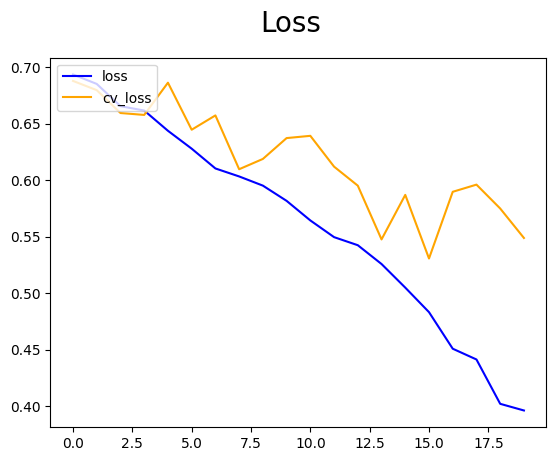

In [69]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

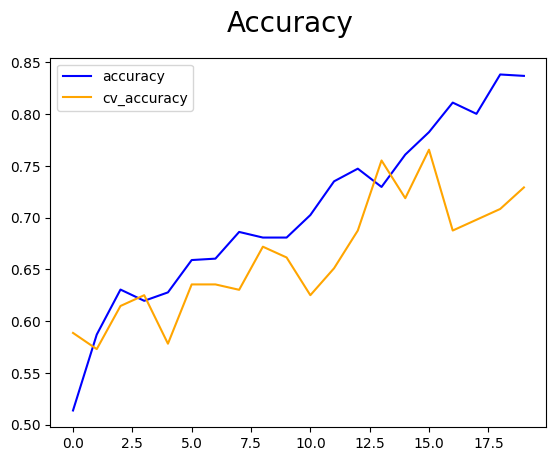

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [74]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8196721076965332, Recall: 0.7692307829856873, Accuracy: 0.796875


In [75]:
from tensorflow.keras.models import load_model

In [76]:
model.save(os.path.join('model','ai_imageclassifier.h5'))

In [77]:
model = load_model(os.path.join('model','ai_imageclassifier.h5'))

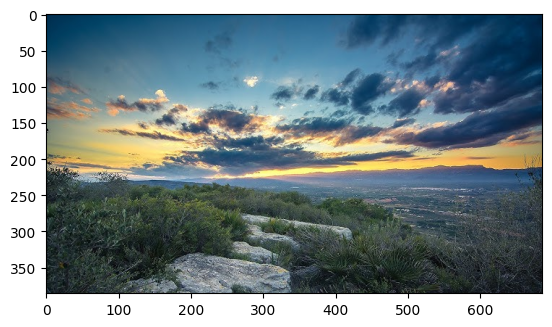

In [78]:
img = cv2.imread('ex4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [79]:
resize = tf.image.resize(img, (32, 32))

In [80]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [81]:
y_pred

array([[0.73580015]], dtype=float32)

In [82]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: REAL
